In [1]:
import project_path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from attwizard.script.utils import load_json_file

**Goal**:
1. create a dataset with the submitted/approved users (e.g. workerId, task name, submission_time, randomcode, google form score of first submission, approved column, etc.)
1. derive a the intermediate char events form the main task of the users in the dataset

# Dataset Creation

In [4]:
EXP_NAME = "hum_v06"
AMTURK_DOWNLOADABLE_CSV = "Batch_4818333_batch_results.csv"

In [6]:
from hrr.validator import evaluate_user
from pandas.errors import EmptyDataError

user_summary_dir = f"../data/hrr/{EXP_NAME}/user_evaluation/user_summary"
all_csv_files = [
    os.path.join(user_summary_dir, f)
    for f in os.listdir(user_summary_dir)
    if f.endswith(".csv")
]

all_dfs = []
for f in all_csv_files:
    try: 
        df = pd.read_csv(f)
        all_dfs.append(df)
    except EmptyDataError as e:
        print(f"{f} is empty")
decisions = []
for df_user in all_dfs:
    nickname = df_user["nickname"].iloc[0]
    decision_dict = evaluate_user(df_user)
    #print(f"{nickname} | Accepted: {decision} {message}")
    decisions.append({
        "nickname": nickname,
        **decision_dict
    })

df_all = pd.DataFrame.from_records(decisions)
df_all.head(20)

../data/hrr/hum_v06/user_evaluation/user_summary/ALPE04K0ED0RZ.csv is empty


,nickname,approved,message,reason
0,AYSTMCRE2AE7T,True,Approved. Good Job.,"average_time_per_task: 842.5496666666667, min_..."
1,A3QXI7YJY3WS4K,False,You spent too little time to be compatible wit...,"average_time_per_task: 119.20333333333333, min..."
2,A392YUIHKW8SFN,False,Your first submission to the warm-up task cont...,survey_score: 5
3,A3GUC6GIB2HKZB,False,Your first submission to the warm-up task cont...,survey_score: 3
4,A3GS427QFCU7IZ,False,Your first submission to the warm-up task cont...,survey_score: 1
5,A2P2GJ3TLYTWW3,False,You spent too little time to be compatible wit...,"average_time_per_task: 119.76299999999999, min..."
6,A2CA27PX9YR73X,False,Your first submission to the warm-up task cont...,survey_score: 3
7,A371SNJNNUY9Z6,False,Some questions of the main task (if not all) w...,answers: How would you expect the run time of...
8,A17IPELR5NC2LZ,False,Your first submission to the warm-up task cont...,survey_score: 5
9,A2TEPB7EVBFEZR,False,Some questions of the main task (if not all) w...,answers: Which is the base case of the algori...


<AxesSubplot:xlabel='approved', ylabel='count'>

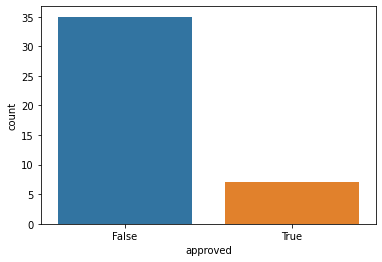

In [7]:
import seaborn as sns
sns.countplot(x="approved", data=df_all)

<AxesSubplot:xlabel='count', ylabel='message'>

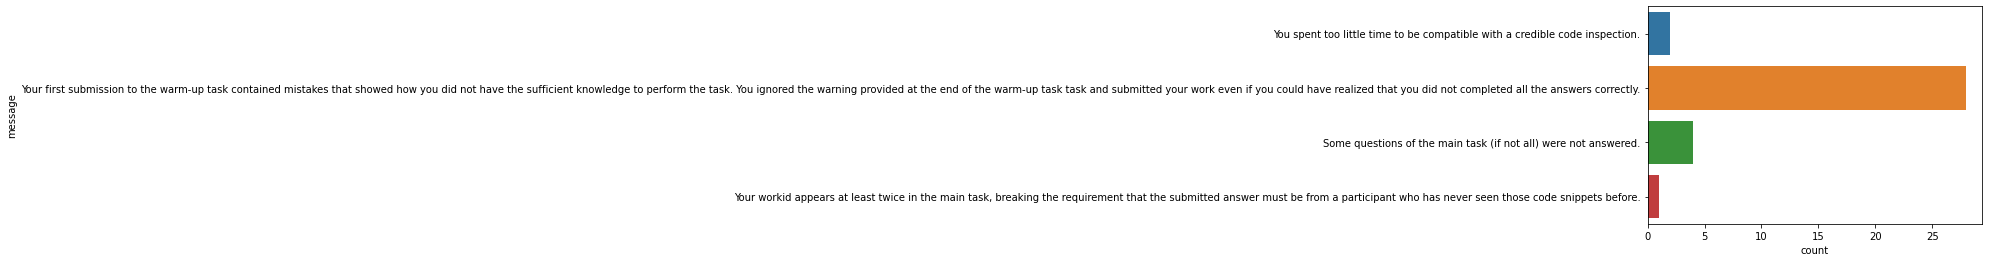

In [8]:
df_rejected = df_all[df_all["approved"] == False]
df_approved = df_all[df_all["approved"] == True]

sns.countplot(
    data=df_rejected,
    y="message",
)

## Inspect data

In [9]:
for reason in df_all["message"].unique():
    df_reason = df_all[df_all["message"] == reason]
    print("*" * 100)
    print(f"{reason}")
    for i, row in df_reason.sort_values(by="approved").iterrows():
        print("=" * 100)
        print(row["nickname"])
        print(row["approved"])
        print(row["message"])
        print(row["reason"])

****************************************************************************************************
Approved. Good Job.
AYSTMCRE2AE7T
True
Approved. Good Job.
average_time_per_task: 842.5496666666667, min_time_per_task: 496.638 : [{'randomcode': '5d8d12319d5ef611fe978d93c5bca73c', 'openedPageDatetime': Timestamp('2022-09-05 21:27:16.253000'), 'completejsexecution': 1, 'completed': True, 'task_duration_seconds': 496.638}, {'randomcode': '5d8d12319d5ef611fe978d93c5bca73c', 'openedPageDatetime': Timestamp('2022-09-05 21:36:02.687000'), 'completejsexecution': 1, 'completed': True, 'task_duration_seconds': 762.54}, {'randomcode': '5d8d12319d5ef611fe978d93c5bca73c', 'openedPageDatetime': Timestamp('2022-09-05 21:05:26.321000'), 'completejsexecution': 1, 'completed': True, 'task_duration_seconds': 1268.471}]answers:  What are valid dimensions and values for the array `board`?  - # Answer:1,1; 2,3;3,2;4,4                                                                             
 How does t

In [10]:
len(df_rejected)

35

In [11]:
df_downloaded = pd.read_csv(f"../data/hrr/{EXP_NAME}/results/{AMTURK_DOWNLOADABLE_CSV}")
# keep only those lines with empty RequesterFeedback column
df_downloaded = df_downloaded[df_downloaded["RequesterFeedback"].isna()]
display(df_downloaded["Reject"])
# remove Reject column
df_downloaded.drop(columns=["Reject"], inplace=True)

0    NaN
1    NaN
3    NaN
6    NaN
9    NaN
10   NaN
11   NaN
13   NaN
14   NaN
15   NaN
19   NaN
20   NaN
22   NaN
24   NaN
27   NaN
32   NaN
33   NaN
34   NaN
38   NaN
40   NaN
42   NaN
Name: Reject, dtype: float64

In [13]:
len(df_downloaded)

21

In [15]:
df_downloaded["WorkerId"].unique()

array(['A38KKBCQ8KGBGK', 'A1ZLSCWRCVDPDS', 'A77YYQ35GWQ4S',
       'A258PTOZ3D2TQR', 'A392YUIHKW8SFN', 'ALPE04K0ED0RZ',
       'AYSTMCRE2AE7T', 'ACC67C294M03Q', 'A2P5TZOFBLWU2Q',
       'A2CA27PX9YR73X', 'A17LI0UQ4AAX96', 'A16HPI1KY7EIO6',
       'A2P2GJ3TLYTWW3', 'A2ATMJRPF86PSM', 'A1ALRR1J25RBYX',
       'AXMTB3Z1SCJWR', 'A2D749IVOS2YZ4', 'A2COCSUGZV28X',
       'A2MEF2PMF5YZ0X', 'A1YFA3HQGD93R', 'A38YPLBS1IF3DX'], dtype=object)

In [14]:
from time import time
current_timestamp = int(time()) 
df_to_submit = df_rejected[["nickname", "message"]].rename(
    columns={
        "nickname": "WorkerId",
        "message": "Reject",
    }
)

df_to_submit = pd.merge(df_to_submit, df_downloaded, on="WorkerId")
print(len(df_to_submit))

df_to_submit.to_csv(f"../data/hrr/{EXP_NAME}/results/rejected_users_{current_timestamp}.csv", index=False)

13


In [17]:
set(df_downloaded["WorkerId"]) - set(df_to_submit["WorkerId"])

{'A258PTOZ3D2TQR',
 'A2ATMJRPF86PSM',
 'A2COCSUGZV28X',
 'A2D749IVOS2YZ4',
 'A2MEF2PMF5YZ0X',
 'ALPE04K0ED0RZ',
 'AXMTB3Z1SCJWR',
 'AYSTMCRE2AE7T'}